In [1]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from utils import networks, util
import copy
from keras import backend as K 
from keras.callbacks import Callback
from keras import callbacks
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


2.2.4


In [2]:
data_train = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('./fashionmnist/fashion-mnist_test.csv')
# Read our image
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

#Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))


X_tr28, X_val28, X_te28, X_tr_res, X_val_res, X_te_res, y_train, y_val = util.prepare_data(X,y,X_test)

In [3]:
batch_size = 256
epochs = 50
num_classes = 10

X_train_flat, X_val_flat, X_test_flat = util.flatten_data(X_tr28, X_val28, X_te28)

In [4]:
datagen = ImageDataGenerator(
            shear_range=0.1, # shear_range is for randomly applying shearing transformations
            zoom_range = 0.01, #zoom_range is for randomly zooming inside pictures
            horizontal_flip=True)

reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
callbacks_list = [reduce_lr_loss, early_stopping]

# Simple CNN

In [5]:
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.simple_cnn(input_shape=(56,56,1))
history = model.fit_generator(datagen.flow(x_t, y_t,batch_size=batch_size),
          steps_per_epoch=len(x_t) / batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v),
          callbacks=[early_stopping, reduce_lr_loss])

util.save_everything(model,'simple_cnn_50ep_fine', history)

Epoch 1/50
188/187 [==============================] - 12s 61ms/step - loss: 0.5401 - acc: 0.8094 - val_loss: 0.3624 - val_acc: 0.8709
Epoch 2/50
188/187 [==============================] - 10s 51ms/step - loss: 0.3309 - acc: 0.8817 - val_loss: 0.3257 - val_acc: 0.8847
Epoch 3/50
188/187 [==============================] - 10s 51ms/step - loss: 0.2753 - acc: 0.9013 - val_loss: 0.3084 - val_acc: 0.8909
Epoch 4/50
188/187 [==============================] - 10s 51ms/step - loss: 0.2441 - acc: 0.9121 - val_loss: 0.2619 - val_acc: 0.9017
Epoch 5/50
188/187 [==============================] - 10s 51ms/step - loss: 0.2194 - acc: 0.9202 - val_loss: 0.2744 - val_acc: 0.8995
Epoch 6/50
188/187 [==============================] - 10s 51ms/step - loss: 0.1972 - acc: 0.9288 - val_loss: 0.2502 - val_acc: 0.9078
Epoch 7/50
188/187 [==============================] - 10s 51ms/step - loss: 0.1781 - acc: 0.9349 - val_loss: 0.2471 - val_acc: 0.9123
Epoch 8/50
188/187 [==============================] - 10s 51ms

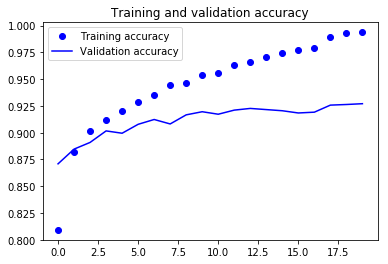

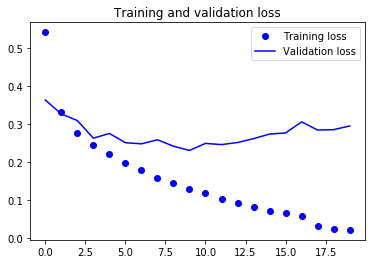

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Simple CNN Dropout

In [7]:
K.clear_session()
del model
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.simple_cnn_dropout(input_shape=(56,56,1))
history = model.fit_generator(datagen.flow(x_t, y_t,batch_size=batch_size),
          steps_per_epoch=len(x_t) / batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v),
          callbacks=[early_stopping, reduce_lr_loss])

util.save_everything(model,'simple_cnn_dropout_50ep_fine', history)

Epoch 1/50
188/187 [==============================] - 10s 53ms/step - loss: 0.5590 - acc: 0.8014 - val_loss: 0.3541 - val_acc: 0.8729
Epoch 2/50
188/187 [==============================] - 10s 52ms/step - loss: 0.3428 - acc: 0.8748 - val_loss: 0.3160 - val_acc: 0.8859
Epoch 3/50
188/187 [==============================] - 10s 51ms/step - loss: 0.2876 - acc: 0.8945 - val_loss: 0.3007 - val_acc: 0.8877
Epoch 4/50
188/187 [==============================] - 10s 51ms/step - loss: 0.2605 - acc: 0.9050 - val_loss: 0.2671 - val_acc: 0.9022
Epoch 5/50
188/187 [==============================] - 10s 51ms/step - loss: 0.2320 - acc: 0.9163 - val_loss: 0.2670 - val_acc: 0.9032
Epoch 6/50
188/187 [==============================] - 10s 51ms/step - loss: 0.2105 - acc: 0.9231 - val_loss: 0.2612 - val_acc: 0.9021
Epoch 7/50
188/187 [==============================] - 10s 51ms/step - loss: 0.1930 - acc: 0.9294 - val_loss: 0.2407 - val_acc: 0.9110
Epoch 8/50
188/187 [==============================] - 10s 51ms

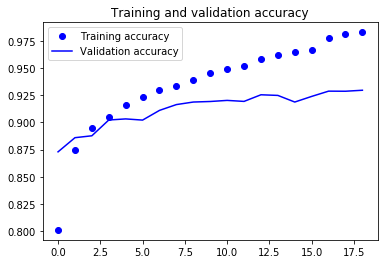

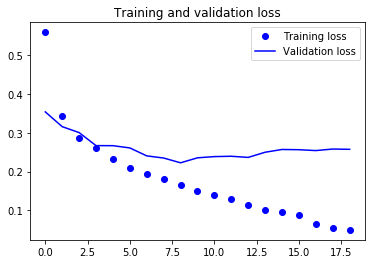

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Simple CNN BatchNorm

In [9]:
K.clear_session()
del model
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.simple_cnn_batchnorm(input_shape=(56,56,1))
history = model.fit_generator(datagen.flow(x_t, y_t,batch_size=batch_size),
          steps_per_epoch=len(x_t) / batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v),
          callbacks=[early_stopping, reduce_lr_loss])

util.save_everything(model,'simple_cnn_bn_50ep_fine', history)

Epoch 1/50
188/187 [==============================] - 10s 54ms/step - loss: 0.4799 - acc: 0.8293 - val_loss: 0.3612 - val_acc: 0.8685
Epoch 2/50
188/187 [==============================] - 10s 51ms/step - loss: 0.2874 - acc: 0.8964 - val_loss: 0.2981 - val_acc: 0.8952
Epoch 3/50
188/187 [==============================] - 10s 51ms/step - loss: 0.2412 - acc: 0.9117 - val_loss: 0.2628 - val_acc: 0.9038
Epoch 4/50
188/187 [==============================] - 10s 51ms/step - loss: 0.2086 - acc: 0.9239 - val_loss: 0.2594 - val_acc: 0.9033
Epoch 5/50
188/187 [==============================] - 10s 51ms/step - loss: 0.1912 - acc: 0.9304 - val_loss: 0.2688 - val_acc: 0.8996
Epoch 6/50
188/187 [==============================] - 10s 51ms/step - loss: 0.1670 - acc: 0.9392 - val_loss: 0.2400 - val_acc: 0.9141
Epoch 7/50
188/187 [==============================] - 10s 51ms/step - loss: 0.1471 - acc: 0.9462 - val_loss: 0.2301 - val_acc: 0.9154
Epoch 8/50
188/187 [==============================] - 10s 51ms

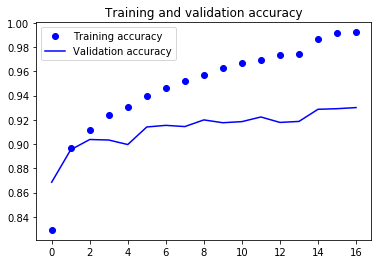

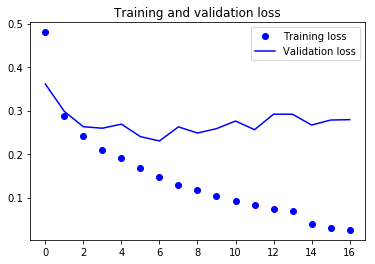

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Simple CNN BatchNorm Dropout

In [11]:
K.clear_session()
del model
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.simple_cnn_batchnorm_Dropout(input_shape=(56,56,1))
history = model.fit_generator(datagen.flow(x_t, y_t,batch_size=batch_size),
          steps_per_epoch=len(x_t) / batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v),
          callbacks=[early_stopping, reduce_lr_loss])

util.save_everything(model,'simple_cnn_bn_do_50ep_fine', history)

Epoch 1/50
188/187 [==============================] - 10s 54ms/step - loss: 0.5267 - acc: 0.8156 - val_loss: 0.3419 - val_acc: 0.8721
Epoch 2/50
188/187 [==============================] - 10s 51ms/step - loss: 0.3169 - acc: 0.8856 - val_loss: 0.2991 - val_acc: 0.8900
Epoch 3/50
188/187 [==============================] - 10s 51ms/step - loss: 0.2659 - acc: 0.9038 - val_loss: 0.2724 - val_acc: 0.9017
Epoch 4/50
188/187 [==============================] - 10s 51ms/step - loss: 0.2350 - acc: 0.9138 - val_loss: 0.2552 - val_acc: 0.9073
Epoch 5/50
188/187 [==============================] - 10s 51ms/step - loss: 0.2119 - acc: 0.9247 - val_loss: 0.2596 - val_acc: 0.9056
Epoch 6/50
188/187 [==============================] - 10s 51ms/step - loss: 0.1958 - acc: 0.9289 - val_loss: 0.2471 - val_acc: 0.9071
Epoch 7/50
188/187 [==============================] - 10s 51ms/step - loss: 0.1774 - acc: 0.9341 - val_loss: 0.2411 - val_acc: 0.9138
Epoch 8/50
188/187 [==============================] - 10s 51ms

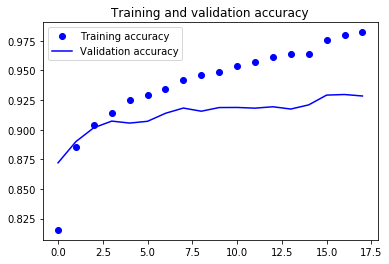

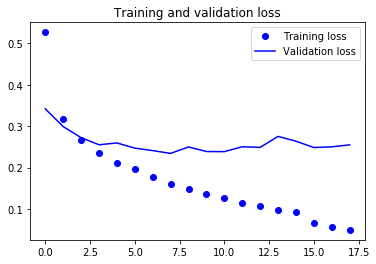

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# AlexNet

In [13]:
K.clear_session()
del model
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.alexnet_model(img_shape=(56,56,1))
history = model.fit_generator(datagen.flow(x_t, y_t,batch_size=4),
          steps_per_epoch=len(x_t) / 4,
          epochs=20,
          verbose=1,
          validation_data=(x_v, y_v),
          callbacks=[early_stopping, reduce_lr_loss])

util.save_everything(model,'alexnet_50ep_fine', history)

Epoch 1/20
12000/12000 [==============================] - 1102s 92ms/step - loss: 1.1415 - acc: 0.6326 - val_loss: 0.5382 - val_acc: 0.8475
Epoch 2/20
12000/12000 [==============================] - 1097s 91ms/step - loss: 0.7904 - acc: 0.7597 - val_loss: 0.4333 - val_acc: 0.8632
Epoch 3/20
12000/12000 [==============================] - 1097s 91ms/step - loss: 0.6826 - acc: 0.7974 - val_loss: 0.4373 - val_acc: 0.8838
Epoch 4/20
12000/12000 [==============================] - 1097s 91ms/step - loss: 0.6163 - acc: 0.8218 - val_loss: 0.4387 - val_acc: 0.8789
Epoch 5/20
12000/12000 [==============================] - 1097s 91ms/step - loss: 0.5679 - acc: 0.8363 - val_loss: 0.5422 - val_acc: 0.8431
Epoch 6/20
12000/12000 [==============================] - 1097s 91ms/step - loss: 0.5227 - acc: 0.8489 - val_loss: 0.4673 - val_acc: 0.8882
Epoch 7/20
12000/12000 [==============================] - 1097s 91ms/step - loss: 0.4938 - acc: 0.8561 - val_loss: 0.4808 - val_acc: 0.8723
Epoch 8/20
12000/120

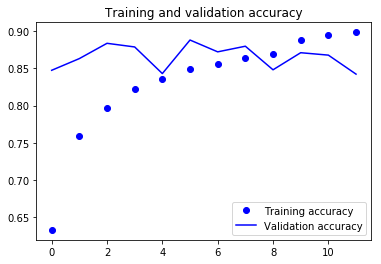

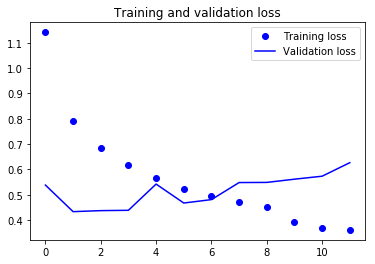

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# mobilenetV2

In [15]:
K.clear_session()
del model

x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.mobilenetV2(input_shape=(56,56,1))
history = model.fit_generator(datagen.flow(x_t, y_t,batch_size=batch_size),
          steps_per_epoch=len(x_t) / batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v),
          callbacks=[early_stopping, reduce_lr_loss])

util.save_everything(model,'mobilenetv2_50ep_fine', history)

Epoch 1/50
188/187 [==============================] - 24s 126ms/step - loss: 0.7210 - acc: 0.7306 - val_loss: 1.0871 - val_acc: 0.7366
Epoch 2/50
188/187 [==============================] - 15s 81ms/step - loss: 0.3973 - acc: 0.8544 - val_loss: 1.0458 - val_acc: 0.7862
Epoch 3/50
188/187 [==============================] - 15s 80ms/step - loss: 0.3239 - acc: 0.8805 - val_loss: 1.1653 - val_acc: 0.7928
Epoch 4/50
188/187 [==============================] - 15s 81ms/step - loss: 0.2876 - acc: 0.8939 - val_loss: 1.0148 - val_acc: 0.8105
Epoch 5/50
188/187 [==============================] - 15s 81ms/step - loss: 0.2616 - acc: 0.9038 - val_loss: 1.1701 - val_acc: 0.8009
Epoch 6/50
188/187 [==============================] - 15s 80ms/step - loss: 0.2433 - acc: 0.9102 - val_loss: 1.3022 - val_acc: 0.8211
Epoch 7/50
188/187 [==============================] - 15s 81ms/step - loss: 0.2309 - acc: 0.9148 - val_loss: 0.8345 - val_acc: 0.8610
Epoch 8/50
188/187 [==============================] - 15s 81m

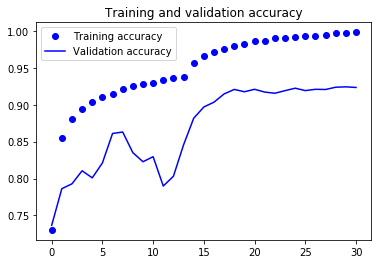

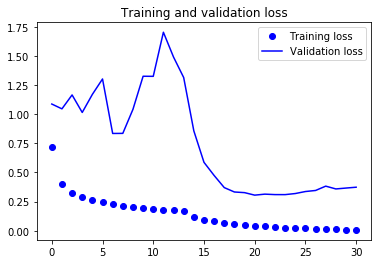

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# nasnet

In [17]:
K.clear_session()
del model
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.nasnet(input_shape=(56,56,1))
history = model.fit_generator(datagen.flow(x_t, y_t,batch_size=batch_size),
          steps_per_epoch=len(x_t) / batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v),
          callbacks=[early_stopping, reduce_lr_loss])

util.save_everything(model,'nasnet_50ep_fine', history)

Epoch 1/50
188/187 [==============================] - 85s 452ms/step - loss: 0.6208 - acc: 0.7731 - val_loss: 1.1047 - val_acc: 0.6962
Epoch 2/50
188/187 [==============================] - 38s 204ms/step - loss: 0.3768 - acc: 0.8629 - val_loss: 2.1377 - val_acc: 0.6240
Epoch 3/50
188/187 [==============================] - 39s 205ms/step - loss: 0.3114 - acc: 0.8870 - val_loss: 1.5657 - val_acc: 0.6780
Epoch 4/50
188/187 [==============================] - 38s 204ms/step - loss: 0.2772 - acc: 0.8976 - val_loss: 2.1322 - val_acc: 0.6457
Epoch 5/50
188/187 [==============================] - 39s 205ms/step - loss: 0.2524 - acc: 0.9070 - val_loss: 2.8090 - val_acc: 0.6510
Epoch 6/50
188/187 [==============================] - 39s 205ms/step - loss: 0.2292 - acc: 0.9158 - val_loss: 2.2587 - val_acc: 0.6776
Epoch 7/50
188/187 [==============================] - 38s 204ms/step - loss: 0.2156 - acc: 0.9205 - val_loss: 2.0877 - val_acc: 0.7050
Epoch 8/50
188/187 [==============================] - 3

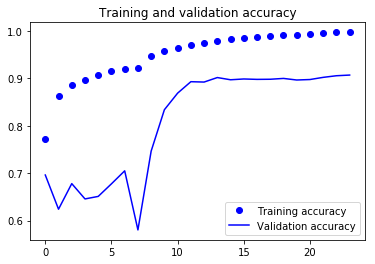

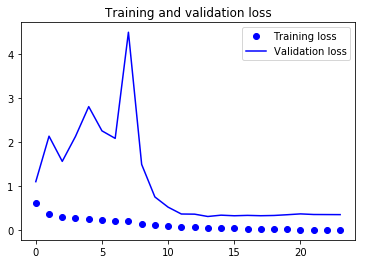

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Inception

In [19]:
K.clear_session()
del model


# InceptionV3 needs at least 75,75 input
_, _, _, X_tr_res, X_val_res, X_te_res, y_train, y_val = util.prepare_data(X,y,X_test,75,75)
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)
model = networks.inceptionV3(input_shape=(75,75,1))
history = model.fit_generator(datagen.flow(x_t, y_t,batch_size=batch_size),
          steps_per_epoch=len(x_t) / batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v),
          callbacks=[early_stopping, reduce_lr_loss])

util.save_everything(model,'inception_50ep_fine', history)

Epoch 1/50
188/187 [==============================] - 45s 240ms/step - loss: 0.6635 - acc: 0.7628 - val_loss: 0.4813 - val_acc: 0.8294
Epoch 2/50
188/187 [==============================] - 28s 148ms/step - loss: 0.3597 - acc: 0.8695 - val_loss: 0.4123 - val_acc: 0.8565
Epoch 3/50
188/187 [==============================] - 28s 148ms/step - loss: 0.2980 - acc: 0.8910 - val_loss: 0.3844 - val_acc: 0.8707
Epoch 4/50
188/187 [==============================] - 28s 147ms/step - loss: 0.2634 - acc: 0.9028 - val_loss: 0.3319 - val_acc: 0.8824
Epoch 5/50
188/187 [==============================] - 28s 147ms/step - loss: 0.2382 - acc: 0.9132 - val_loss: 0.3924 - val_acc: 0.8727
Epoch 6/50
188/187 [==============================] - 28s 147ms/step - loss: 0.2593 - acc: 0.9062 - val_loss: 10.4331 - val_acc: 0.2248
Epoch 7/50
188/187 [==============================] - 28s 148ms/step - loss: 0.2398 - acc: 0.9127 - val_loss: 0.2756 - val_acc: 0.9019
Epoch 8/50
188/187 [==============================] - 

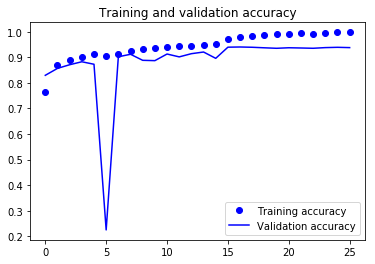

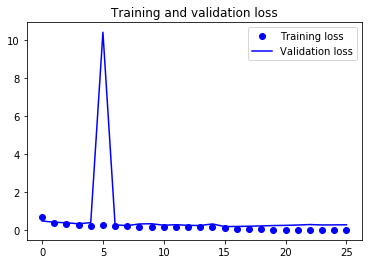

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Resnet

In [21]:
K.clear_session()
del model
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.resnet50(input_shape=(75,75,1))
history = model.fit_generator(datagen.flow(x_t, y_t,batch_size=batch_size),
          steps_per_epoch=len(x_t) / batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v),
          callbacks=[early_stopping, reduce_lr_loss])

util.save_everything(model,'resnet_50ep_fine', history)

Epoch 1/50
188/187 [==============================] - 66s 350ms/step - loss: 0.5785 - acc: 0.8068 - val_loss: 0.4149 - val_acc: 0.8523
Epoch 2/50
188/187 [==============================] - 53s 282ms/step - loss: 0.3205 - acc: 0.8875 - val_loss: 14.5883 - val_acc: 0.0946
Epoch 3/50
188/187 [==============================] - 53s 283ms/step - loss: 0.2674 - acc: 0.9019 - val_loss: 0.2988 - val_acc: 0.8923
Epoch 4/50
188/187 [==============================] - 53s 282ms/step - loss: 0.2090 - acc: 0.9232 - val_loss: 0.2798 - val_acc: 0.9032
Epoch 5/50
188/187 [==============================] - 53s 283ms/step - loss: 0.1850 - acc: 0.9318 - val_loss: 0.2793 - val_acc: 0.8975
Epoch 6/50
188/187 [==============================] - 53s 283ms/step - loss: 0.1715 - acc: 0.9374 - val_loss: 0.2481 - val_acc: 0.9135
Epoch 7/50
188/187 [==============================] - 53s 283ms/step - loss: 0.1582 - acc: 0.9415 - val_loss: 0.3034 - val_acc: 0.8954
Epoch 8/50
188/187 [==============================] - 

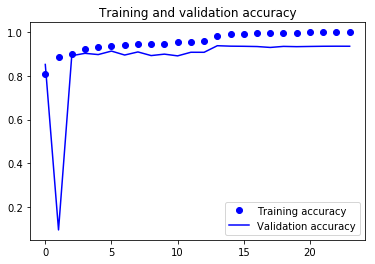

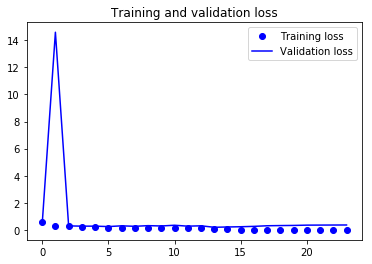

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()